## 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다.

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!

```python
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape
```

## Q1. 전국 시도별 약국수를 구해주세요!

* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다. 
* 다음의 결과가 나오도록 구합니다.

🔽 출력 예시

```
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
```

In [116]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

print(df.shape)

print('== groupby 로 구하기 ==')

df_group = df \
            .loc[df['상권업종소분류명'] == '약국', ['상권업종소분류명', '시도명']] \
            .groupby(['시도명']) \
            .count() \
            .sort_values(['상권업종소분류명'], ascending = False) \
            .astype('int') \
            .reset_index()

for idx, row in df_group.iterrows():
    print(f"{row['시도명']}  {row['상권업종소분류명']}")

print('== pivot table 로 구하기 ==')

df_pivot = df \
            .loc[df['상권업종소분류명'] == '약국', ['상권업종소분류명', '시도명']] \
            .pivot_table(values = '상권업종소분류명', index = '시도명', aggfunc = 'count') \
            .sort_values(by = ['상권업종소분류명'], ascending = False) \
            .astype('int') \
            .reset_index()

for idx, row in df_pivot.iterrows():
    print(f"{row['시도명']}  {row['상권업종소분류명']}")

# value_counts() 장점 : 위와 같이 groupby, pivot_table 을 복잡하게 안 만들면서 자동으로 Sorting 을 시켜준다! (Descending 정렬.)
print('== value_counts 으로 구하기 ==')

df_vcnt = df \
            .loc[df['상권업종소분류명'] == '약국', '시도명'] \
            .value_counts()

print(df_vcnt.to_string())

(91335, 39)
== groupby 로 구하기 ==
경기도  4510
서울특별시  3579
부산광역시  1130
경상남도  1017
인천광역시  1002
경상북도  915
대구광역시  870
전라북도  862
충청남도  830
전라남도  811
강원도  729
광주광역시  691
충청북도  648
대전광역시  603
울산광역시  362
제주특별자치도  226
세종특별자치시  99
== pivot table 로 구하기 ==
경기도  4510
서울특별시  3579
부산광역시  1130
경상남도  1017
인천광역시  1002
경상북도  915
대구광역시  870
전라북도  862
충청남도  830
전라남도  811
강원도  729
광주광역시  691
충청북도  648
대전광역시  603
울산광역시  362
제주특별자치도  226
세종특별자치시  99
== value_counts 으로 구하기 ==
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99


## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

* 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
* 다음의 결과가 나오도록 구합니다.

🔽 출력 예시

```
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64
```

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13


<AxesSubplot:>

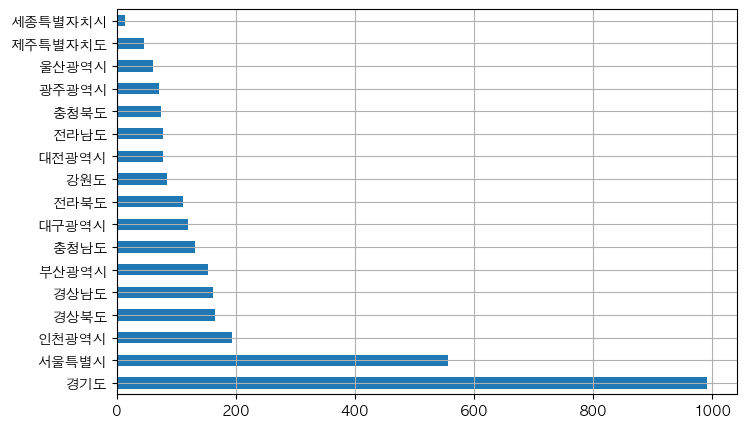

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 기본 설정
plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

# 빈도수를 value_counts() 함수로 정리한다.
df_vcnt = df \
            .loc[df['상권업종소분류명'] == '동물병원', '시도명'] \
            .value_counts()

# 문제에서 요구한 데이터 목록 출력
print(df_vcnt.to_string())

# 그래프 시각화를 통한 빈도수 파악 (경기도 값이 가장 많이 나온다.)
df_vcnt.plot.barh(figsize=(8,5), grid = True)

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다. 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

🔽 출력 예시

```
시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
```

In [118]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

# 조건1 (서울시 피부과, 성형과 개수), 조건2 (서울시 전체 병원 개수) 만족 여부 체크 Boolean 추가
# 이후에 aggregate 로 합침. (True -> 1, False -> 0 으로 계산)
# 계산된 값들에 대해 ratio (비율) 로 취합하여 반올림 이후 역정렬.
df_vcnt = df \
            .assign(condition1 = ((df['시도명'] == '서울특별시') & (df['상권업종소분류명'].str.contains('피부|성형')))) \
            .assign(condition2 = ((df['시도명'] == '서울특별시') & (df['상권업종중분류명'] == '병원'))) \
            .loc[(df['시도명'] == '서울특별시'), ['시군구명', 'condition1', 'condition2']] \
            .groupby(['시군구명']) \
            .agg({ 'condition1': np.sum, 'condition2': np.sum }) \
            .assign(ratio = lambda x: x['condition1'] / x['condition2']) \
            .round({ 'ratio' : 2 }) \
            .loc[:, 'ratio'] \
            .reset_index() \
            .sort_values(by = ['ratio'], ascending = False)

# 문제에서 요구한 데이터 목록 출력
for idx, row in df_vcnt.iterrows():
    print(f"{row['시군구명']}  {row['ratio']}")

강남구  0.24
서초구  0.17
마포구  0.09
영등포구  0.08
서대문구  0.08
강서구  0.07
강동구  0.07
중구  0.07
양천구  0.07
중랑구  0.07
성북구  0.06
송파구  0.06
구로구  0.06
은평구  0.06
광진구  0.06
노원구  0.05
성동구  0.05
금천구  0.05
용산구  0.05
강북구  0.05
동대문구  0.04
동작구  0.04
관악구  0.04
종로구  0.03
도봉구  0.02


## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html

🔽 출력 예시 (지도 이미지 참조)
![지도](https://cphinf.pstatic.net/mooc/20221101_2/1667298075217Fvdt7_PNG/mceclip0.png)

In [119]:
import pandas as pd
import folium

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

df_silver_hosp = df[df['상권업종소분류명'] == '노인/치매병원'].copy()

lat = df_silver_hosp['위도'].mean()
lot = df_silver_hosp['경도'].mean()

map = folium.Map(
    location = [lat, lot], 
    zoom_start = 8 
)

for n in df_silver_hosp.index:
    name = df_silver_hosp.loc[n, '상호명']
    address = df_silver_hosp.loc[n, '도로명주소']
    popup = f"{name} - {address}"
    tlat = df_silver_hosp.loc[n, '위도']
    tlot = df_silver_hosp.loc[n, '경도']
    folium.Marker(
        location = [tlat, tlot], popup = popup
    ).add_to(map)

map